# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [7]:
df = pd.read_csv('data.csv')
df.shape

(6819, 96)

In [8]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [69]:
df.sample(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4261,0,0.479598,0.545628,0.529365,0.597270,0.597270,0.998973,0.797409,0.809329,0.303550,...,0.803170,0.002301,0.623678,0.597266,0.840746,0.282146,0.026946,0.565801,1,0.023199
766,0,0.507678,0.552715,0.556775,0.609305,0.609305,0.999067,0.797472,0.809399,0.303463,...,0.806298,0.001144,0.622993,0.609302,0.840851,0.279351,0.027143,0.566416,1,0.030961
3229,0,0.511237,0.561219,0.570855,0.614437,0.614437,0.999095,0.797543,0.809475,0.303530,...,0.811257,0.003179,0.629043,0.614437,0.840959,0.276716,0.026850,0.565425,1,0.057805
4588,0,0.504656,0.522242,0.548423,0.603886,0.603944,0.998910,0.797297,0.809229,0.303486,...,0.790082,0.007121,0.623251,0.603885,0.839607,0.278709,0.026496,0.563204,1,0.034269
5204,0,0.484083,0.552769,0.537663,0.606084,0.606084,0.999028,0.797422,0.809345,0.303457,...,0.807690,0.000656,0.624044,0.606081,0.840833,0.277790,0.026860,0.565468,1,0.041372


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [16]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

# Optionally, show the percentage of missing values
missing_percentage = (missing_columns / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

Columns with missing values:
Series([], dtype: int64)

Percentage of missing values in each column:
Series([], dtype: float64)


There are no missing values

In [13]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [14]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 96)


There are no duplicated rows

After conducting initial data checks, we will use a decision tree model to predict which companu will become bankrupt. To determine the optimal tree depth for the highest validation accuracy, we will evaluate decision tree models with varying depths and compare their performance on the validation data.

Depth = 1, train_acc = 0.9688, eval_acc = 0.9619
Depth = 2, train_acc = 0.9721, eval_acc = 0.9658
Depth = 3, train_acc = 0.9738, eval_acc = 0.9638
Depth = 4, train_acc = 0.9788, eval_acc = 0.9599
Depth = 5, train_acc = 0.9814, eval_acc = 0.9599
Depth = 6, train_acc = 0.9845, eval_acc = 0.9589
Depth = 7, train_acc = 0.9874, eval_acc = 0.9560
Depth = 8, train_acc = 0.9904, eval_acc = 0.9560


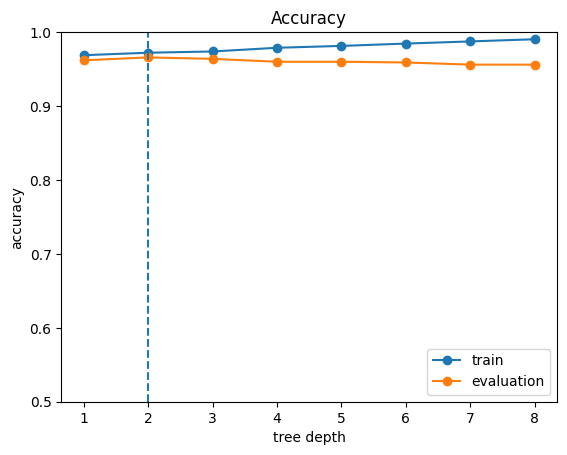

In [41]:
# Separate the data into features and target class.
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    dt_model = DecisionTreeClassifier(max_depth=d)
    dt_model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = dt_model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = dt_model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

The results show that the model shows signs of overfitting. As the tree depth increases, it performs better on the training data but worse on the evaluation set. The Evaluation Accuracy is highest at Depth = 1 (97.26%).

Optimal depth = 2, test_acc = 0.9687


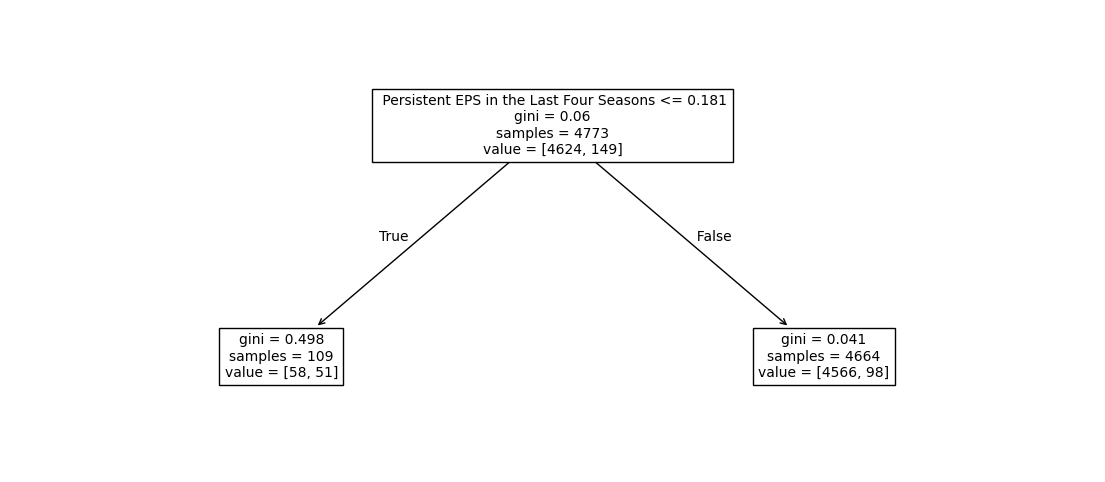

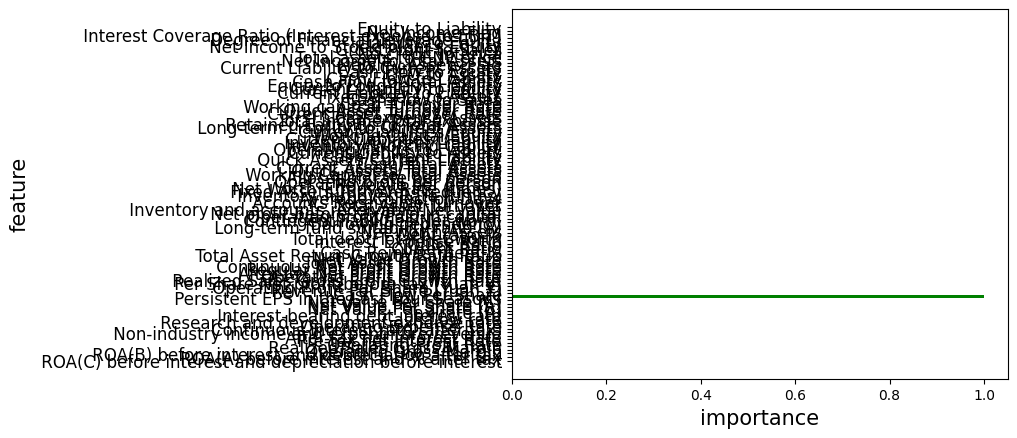

feature importance = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [42]:
# I set max_step=2 as a constant value for tree visualization.
dt_model = DecisionTreeClassifier(max_depth=1)
dt_model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = dt_model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(dt_model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.
feature_importance = dt_model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=12)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))

In [43]:
feature_importances = pd.Series(dt_model.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importances.head(10))

Persistent EPS in the Last Four Seasons                    1.0
ROA(A) before interest and % after tax                     0.0
ROA(C) before interest and depreciation before interest    0.0
Operating Gross Margin                                     0.0
Realized Sales Gross Margin                                0.0
Operating Profit Rate                                      0.0
ROA(B) before interest and depreciation after tax          0.0
After-tax net Interest Rate                                0.0
Non-industry income and expenditure/revenue                0.0
Continuous interest rate (after tax)                       0.0
dtype: float64


The results show that only one feature, Net Income to Stockholder's Equity, has an importance score of 1.0, indicating the model relies solely on this feature to predict if the company has gone bankrupt. All other features have an importance score of 0.0, meaning they don't contribute to the model's decision-making.

Let's try using another model, RandomForestClassifier

Persistent EPS in the Last Four Seasons    0.030831
Net Value Growth Rate                      0.028839
Net Income to Stockholder's Equity         0.028614
Net profit before tax/Paid-in capital      0.024519
Borrowing dependency                       0.024116
Working Capital/Equity                     0.023201
Net Value Per Share (B)                    0.020210
Degree of Financial Leverage (DFL)         0.019991
Interest Expense Ratio                     0.018670
Total debt/Total net worth                 0.018112
dtype: float64


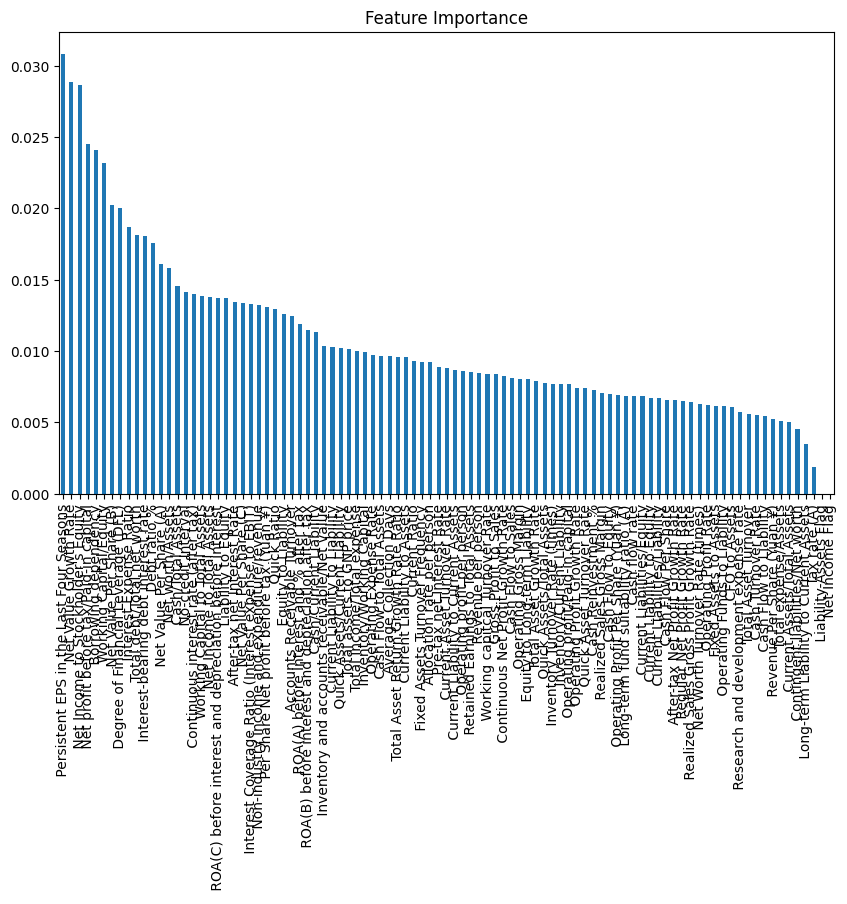

In [40]:
# Fit the model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)  # X_train, y_train are your features and target

# Get feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=x_train.columns)

# Sort and visualize
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print(feature_importances_sorted.head(10))

# Plot feature importance
feature_importances_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


The results show that the feature importance for this model is more spread out across multiple predictors, which suggests that the model is not relying heavily on any single feature but rather leveraging multiple factors. This is typically a good sign, indicating that the model is considering a broader set of features in its decision-making process.

In [55]:
y_pred = rf_model.predict(x_test)

In [56]:
# Calculate Model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.989247311827957


Now, let's create another dataframe with only the top 10 features that can best predict whether a company will go bankrupt. 

In [79]:
selected_features = [
    ' Net Income to Stockholder\'s Equity',
    ' Net Value Growth Rate',
    ' Net profit before tax/Paid-in capital',
    ' Persistent EPS in the Last Four Seasons',
    ' Borrowing dependency',
    ' Net Value Per Share (A)',
    ' Degree of Financial Leverage (DFL)',
    ' Interest Coverage Ratio (Interest expense to EBIT)',
    ' Per Share Net profit before tax (Yuan ¥)',
    ' Net worth/Assets'
]

In [80]:
filtered_df = df[selected_features]
filtered_df.head()

,Net Income to Stockholder's Equity,Net Value Growth Rate,Net profit before tax/Paid-in capital,Persistent EPS in the Last Four Seasons,Borrowing dependency,Net Value Per Share (A),Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Per Share Net profit before tax (Yuan ¥),Net worth/Assets
0,0.827890,0.000327,0.137757,0.169141,0.390284,0.147950,0.026601,0.564050,0.138736,0.792424
1,0.839969,0.000443,0.168962,0.208944,0.376760,0.182251,0.264577,0.570175,0.169918,0.828824
2,0.836774,0.000396,0.148036,0.180581,0.379093,0.177911,0.026555,0.563706,0.142803,0.792484
3,0.834697,0.000382,0.147561,0.193722,0.379743,0.154187,0.026697,0.564663,0.148603,0.848535
4,0.839973,0.000439,0.167461,0.212537,0.375025,0.167502,0.024752,0.575617,0.168412,0.893491


In [90]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Now, we'll run the RandomForestClassifier model again but in the filtered dataframe with only 10 columns

In [91]:
X = filtered_df
y = df['Bankrupt?']

In [97]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42
)

In [98]:
# Create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
# Prediction on the test set
y_pred = classifier.predict(X_test)

In [100]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9721407624633431


In [101]:
# Check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)
feature_importances_df

,feature,importance
0,Net Income to Stockholder's Equity,0.118091
1,Net Value Growth Rate,0.114059
4,Borrowing dependency,0.110447
3,Persistent EPS in the Last Four Seasons,0.107351
2,Net profit before tax/Paid-in capital,0.098944
6,Degree of Financial Leverage (DFL),0.097486
9,Net worth/Assets,0.091512
5,Net Value Per Share (A),0.089691
7,Interest Coverage Ratio (Interest expense to ...,0.089295
8,Per Share Net profit before tax (Yuan ¥),0.083123


It seems that the first RandomForest model (with all features) achieved a higher accuracy (0.9892) compared to the second model (with only the top 10 features, accuracy of 0.9721). This could indicate that the original data were more informative for the model.

### In conclusion

In this project, we built a classification model to predict company bankruptcy using data from the Taiwan Economic Journal. The first RandomForest model, which included all available features, achieved an accuracy of 0.9892, outperforming the second model that utilized only the top 10 features, which had an accuracy of 0.9721. This suggests that the full set of features provided more valuable information for predicting bankruptcy. We excluded the DecisionTree model as it was prone to overfitting.
<br/><br/>
Moreover, the analysis of feature importance revealed that financial ratios, such as 'Net Income to Stockholder’s Equity' and 'Net Value Growth Rate,' were key factors in predicting bankruptcy risk. Understanding these key features provides valuable insights for stakeholders in the financial sector, enabling more informed decision-making regarding a company’s financial health.
<br/><br/>
Looking ahead, improvements can be made by exploring additional feature selection methods or applying regularization techniques to reduce overfitting and enhance generalization. Experimenting with other algorithms such as gradient boosting or support vector machines could also lead to better model performance.
